In [1]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,label_binarize
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn import linear_model, tree,metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.inspection import permutation_importance
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.model_selection import cross_validate,cross_val_predict,train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score, recall_score,make_scorer
from sklearn.metrics import confusion_matrix,roc_curve, auc, precision_recall_curve
from sklearn.metrics import cohen_kappa_score,average_precision_score
import numpy as np
import pandas as pd
from scipy import interp
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
feature=pd.read_csv('S1_features.csv')
pd.set_option("display.max_columns", 22)
feature.set_index('ID',inplace=True)

feature.head(5)

,Density,Distance,Time,Gender,Age,MaritalStatus,HouseholdSize,CHS,OcR,IncomeT,METT,BLanes,MBus,walking_cycling,M_motocycle,M_car,tricycle_taxi,taxi,Secondary_lower,HND,Degree,Posgraduate
ID,,,,,,,,,,,,,,,,,,,,,,
1,0,3.5,15,1,43,0,5,2,0,1.40,0.000,1,1,0,0,0,0,1,0,1,0,0
2,1,3.0,5,1,36,1,4,2,0,0.45,0.300,0,1,0,0,1,0,0,1,0,0,0
3,1,3.0,7,1,55,0,4,1,0,1.50,0.030,1,0,0,1,0,0,0,0,1,0,0
4,1,5.0,10,1,34,0,4,1,0,1.35,0.025,1,0,0,1,0,0,0,0,1,0,0
5,1,3.0,7,1,48,1,1,6,0,0.75,0.030,1,0,0,1,0,0,0,0,1,0,0


In [3]:
train_set=pd.read_csv('S2_features_train_set.csv')
pd.set_option("display.max_columns", 22)
train_set.set_index('ID',inplace=True)

train_set.head(2)

,Density,Distance,Time,Gender,Age,MaritalStatus,HouseholdSize,CHS,OcR,IncomeT,METT,BLanes,MBus,M_motocycle,M_car,tricycle_taxi,taxi,HND,Degree,Posgraduate
ID,,,,,,,,,,,,,,,,,,,,
118,0,3.0,8,1,37,0,8,3,1,1.7,0.20,1,0,1,0,0,0,1,0,0
149,1,8.6,25,0,28,0,2,0,0,1.6,0.15,1,0,0,0,0,0,1,0,0


In [4]:
test_set=pd.read_csv('S3_features_test_set.csv')
pd.set_option("display.max_columns", 22)
test_set.set_index('ID',inplace=True)

test_set.head(2)

,Density,Distance,Time,Gender,Age,MaritalStatus,HouseholdSize,CHS,OcR,IncomeT,METT,BLanes,MBus,M_motocycle,M_car,tricycle_taxi,taxi,HND,Degree,Posgraduate
ID,,,,,,,,,,,,,,,,,,,,
296,1,3.0,15,0,34,1,1,0,0,0.53,0.06,1,1,0,1,0,0,0,0,0
356,0,6.2,25,0,34,0,4,2,1,0.45,0.13,0,1,0,0,1,0,0,0,1


In [5]:
feature_description=pd.read_csv('S7_feature_description.csv')
pd.set_option("display.max_colwidth", 150)

feature_description

,Features,Description
0,Density,1 if respondent resides within 2km from the Central Bussiness District
1,Distance,Average travel distance to work in kilometres
2,Time,Average travel time to work in minutes
3,Gender,1 if respondent is a male
4,Age,Age of the respondents
5,MaritalStatus,1 if respondent is maried
6,HouseholdSize,Household size of the respondent
7,CHS,Number of childered in the respondent household
8,OcR,1 if respondent is a senior staff
9,IncomeT,"Average monthly income of the respondent in GH¢1,000.00"


In [6]:
outcome=pd.read_csv('S4_Outcome.csv')
outcome.set_index('ID',inplace=True)

outcome.head(2)

,Vown
ID,
1.0,1
2.0,2


In [7]:
outcome_train=pd.read_csv('S5_outcome_train_set.csv')
outcome_train.set_index('ID',inplace=True)

outcome_train.head(2)

,Vown
ID,
118,1
149,0


In [8]:
outcome_test=pd.read_csv('S6_outcome_test_set.csv')
outcome_test.set_index('ID',inplace=True)

outcome_test.head(2)

,Vown
ID,
296,2
356,2


In [9]:
y_train=outcome_train.Vown

y_test=outcome_test.Vown

In [10]:
outcome_descrition=pd.read_csv('S8_Outcome_description.csv')

outcome_descrition

,code,description
0,0,no_vehicle
1,1,motorcycle
2,2,car


In [11]:
xb=feature.drop(['Secondary_lower','walking_cycling'],axis='columns')
xb.head(2)

,Density,Distance,Time,Gender,Age,MaritalStatus,HouseholdSize,CHS,OcR,IncomeT,METT,BLanes,MBus,M_motocycle,M_car,tricycle_taxi,taxi,HND,Degree,Posgraduate
ID,,,,,,,,,,,,,,,,,,,,
1,0,3.5,15,1,43,0,5,2,0,1.40,0.0,1,1,0,0,0,1,1,0,0
2,1,3.0,5,1,36,1,4,2,0,0.45,0.3,0,1,0,1,0,0,0,0,0


In [12]:
X=xb.values

print(X)

[[ 0.   3.5 15.  ...  1.   0.   0. ]
 [ 1.   3.   5.  ...  0.   0.   0. ]
 [ 1.   3.   7.  ...  1.   0.   0. ]
 ...
 [ 1.   7.2 30.  ...  0.   0.   0. ]
 [ 0.   5.  25.  ...  0.   0.   0. ]
 [ 1.   9.4 32.  ...  0.   0.   1. ]]


In [13]:
y=outcome.Vown
y.head(2)

ID
1.0    1
2.0    2
Name: Vown, dtype: int64

In [14]:
fatures_names=xb.columns
class_names=['no_vehicle','motorcycle', 'car']
fatures_names

Index(['Density', 'Distance', 'Time', 'Gender', 'Age', 'MaritalStatus',
       'HouseholdSize', 'CHS', 'OcR', 'IncomeT', 'METT', 'BLanes', 'MBus',
       'M_motocycle', 'M_car', 'tricycle_taxi', 'taxi', 'HND', 'Degree',
       'Posgraduate'],
      dtype='object')

# Permutation Feature Importance

<ipython-input-15-b84a5f4064d3>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,0].set_yticklabels(fatures_names[sorted_idx_lr],fontsize=6)
<ipython-input-15-b84a5f4064d3>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,1].set_yticklabels(fatures_names[sorted_idx_SGDC],fontsize=6)
<ipython-input-15-b84a5f4064d3>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,2].set_yticklabels(fatures_names[sorted_idx_Lsvc],fontsize=6)
<ipython-input-15-b84a5f4064d3>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,0].set_yticklabels(fatures_names[sorted_idx_model_tree],fontsize=6)
<ipython-input-15-b84a5f4064d3>:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,1].set_yticklabels(fatures_names[sorted_idx_model_forest],fontsize=6)
<ipython-input-15-b84a5f4064d3>:74: UserWarning: FixedFormatter should only be used toget

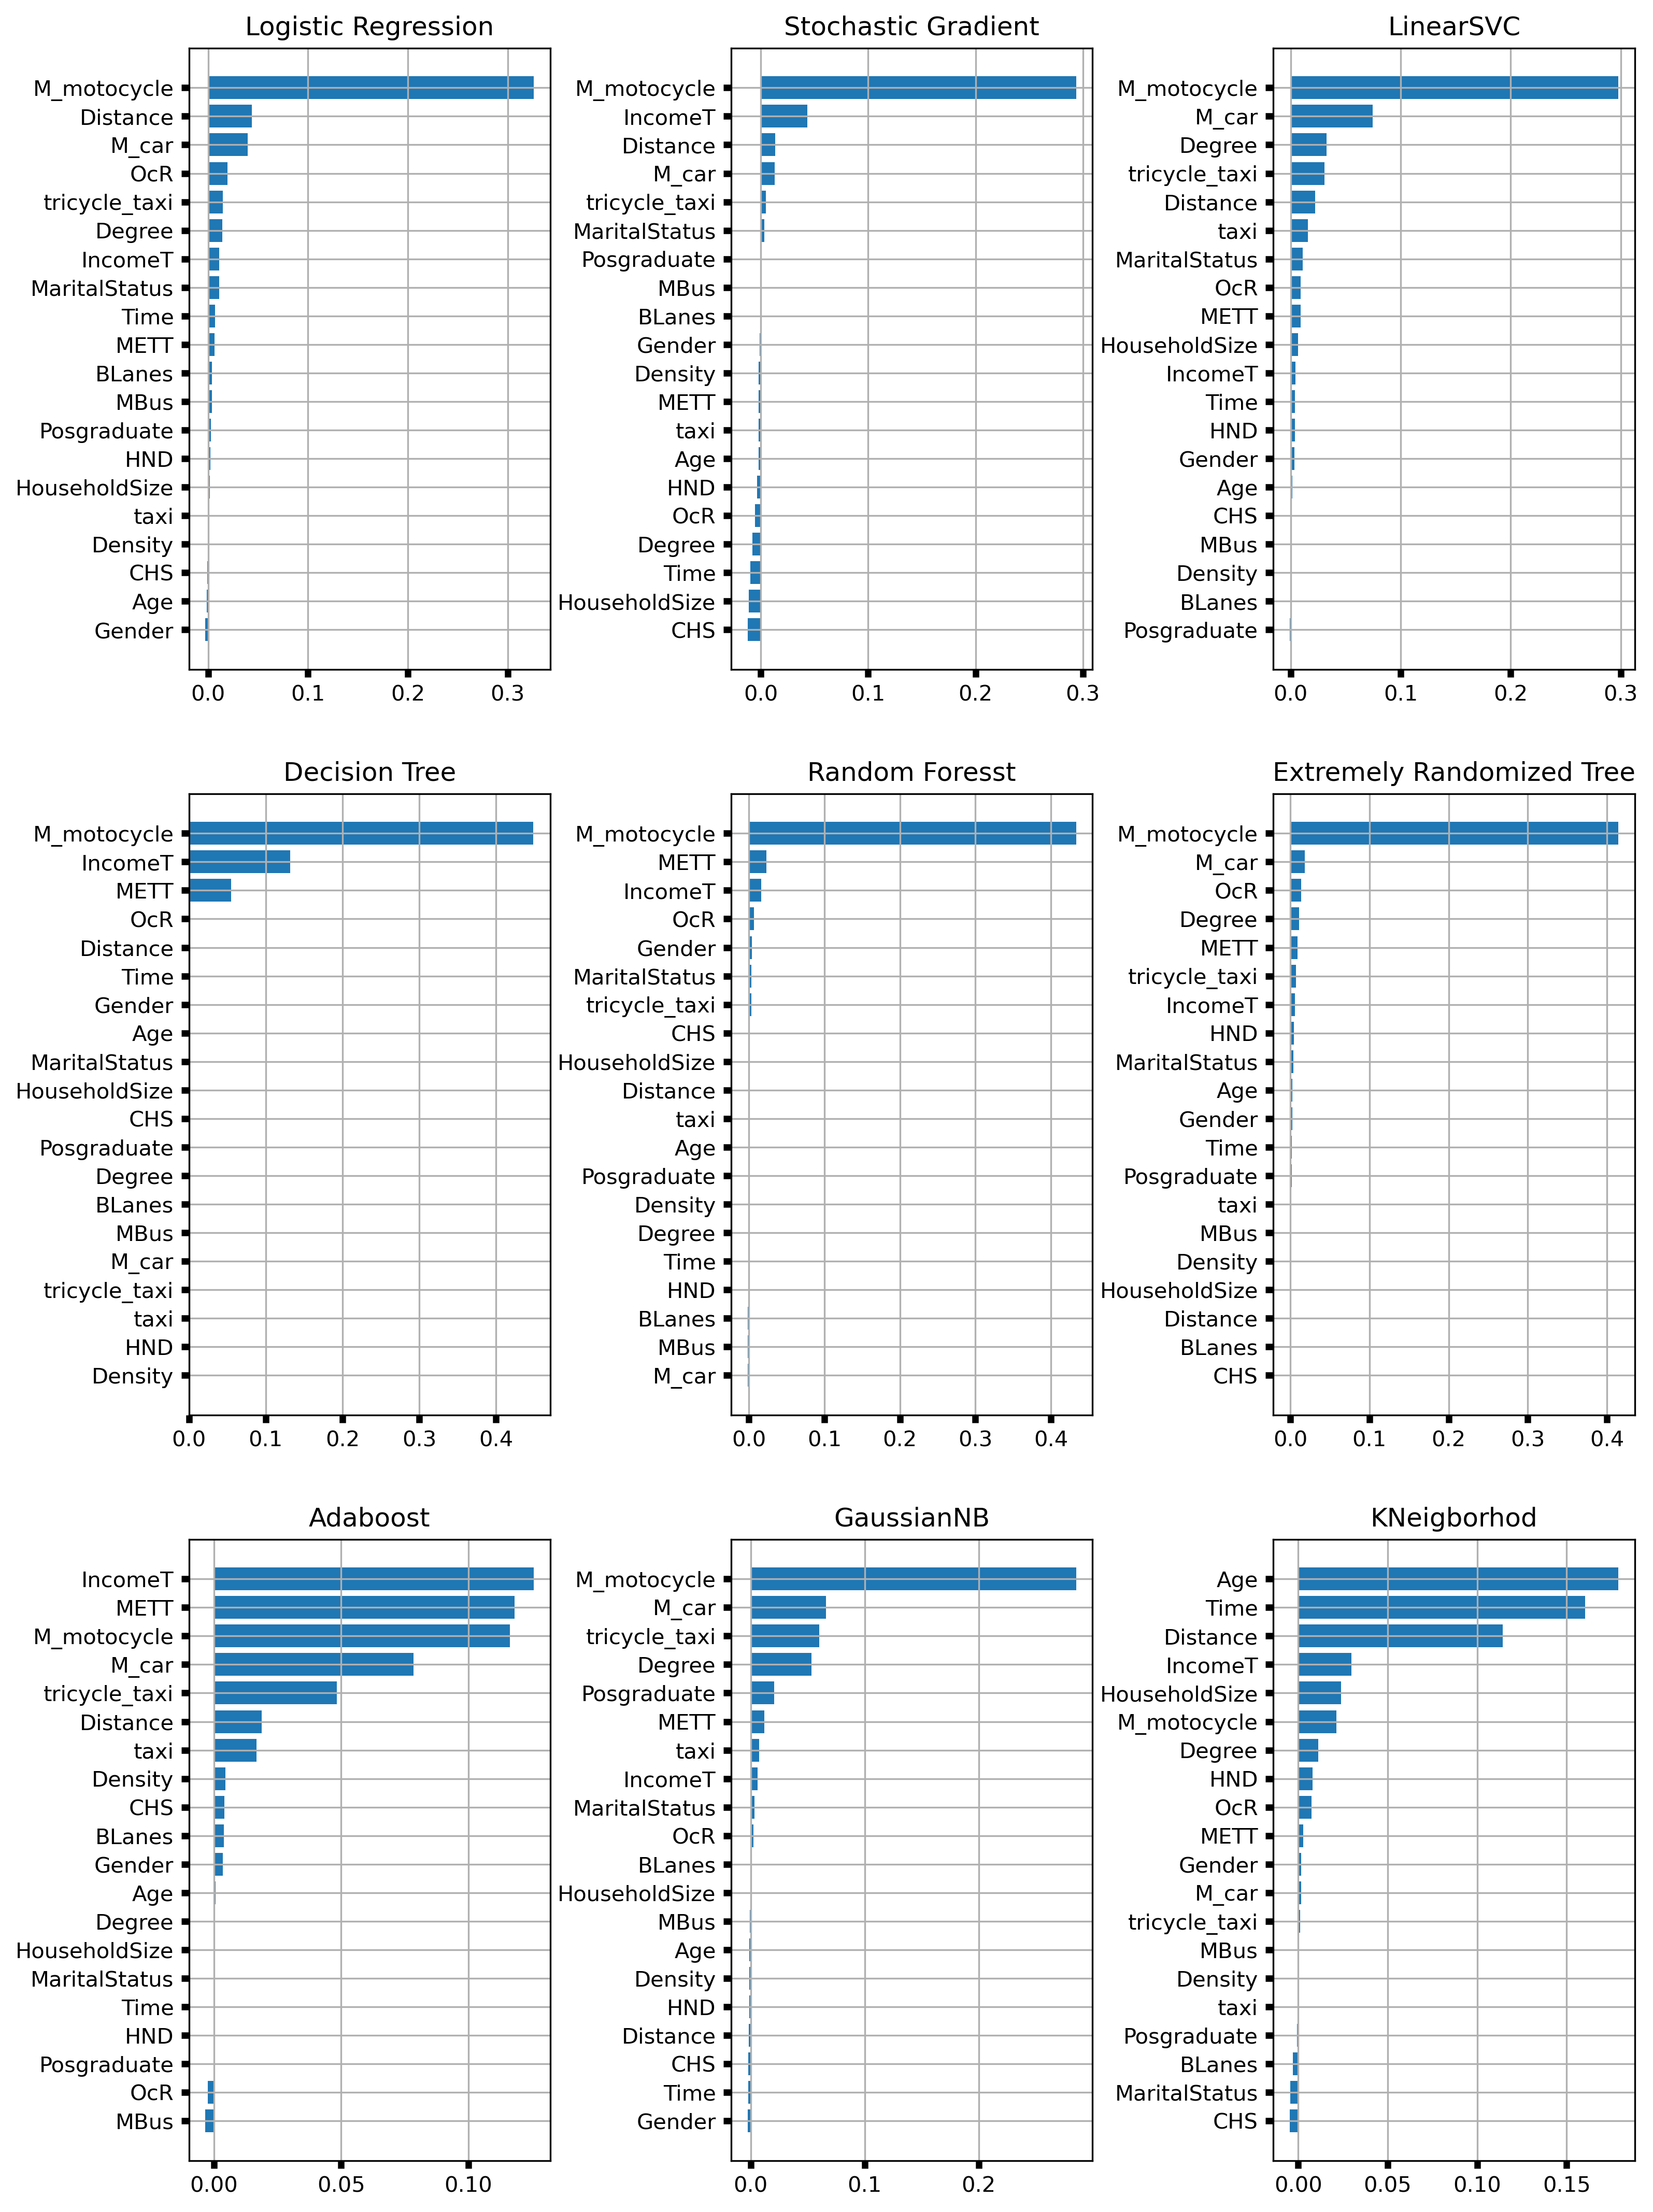

In [15]:
fig, ax = plt.subplots(3,3,figsize=(12,18),dpi=300)
# Training classifiers
lr=LogisticRegression(solver='newton-cg', multi_class='auto', C=1.0)
lr.fit(xb,y)
result_lr = permutation_importance(lr, xb, y, n_repeats=10, random_state=0,n_jobs=None)
sorted_idx_lr = result_lr.importances_mean.argsort()
y_ticks = np.arange(0, len(fatures_names))
ax[0,0].barh(y_ticks, result_lr.importances_mean[sorted_idx_lr])
ax[0,0].set_yticklabels(fatures_names[sorted_idx_lr],fontsize=6)
ax[0,0].set_yticks(y_ticks)
ax[0,0].grid(True)
ax[0,0].tick_params(labelsize=10, width=3)
ax[0,0].set_title('Logistic Regression',fontsize=12)

SGDC=linear_model.SGDClassifier(loss='log',max_iter=1000, tol=1e-3)
SGDC.fit(xb,y)
result_SGDC = permutation_importance(SGDC, xb, y, n_repeats=10, random_state=0,n_jobs=None)
sorted_idx_SGDC = result_SGDC.importances_mean.argsort()
y_ticks = np.arange(0, len(fatures_names))
ax[0,1].barh(y_ticks, result_SGDC.importances_mean[sorted_idx_SGDC])
ax[0,1].set_yticklabels(fatures_names[sorted_idx_SGDC],fontsize=6)
ax[0,1].set_yticks(y_ticks)
ax[0,1].grid(True)
ax[0,1].tick_params(labelsize=10, width=3)
ax[0,1].set_title('Stochastic Gradient',fontsize=12)

Lsvc=Pipeline((("scaler", StandardScaler()),
               ("linear_svc", LinearSVC
                (random_state=0, tol=1e-5,max_iter=10000,multi_class='ovr',loss='squared_hinge')),))
Lsvc.fit(xb,y)
result_Lsvc = permutation_importance(Lsvc, xb, y, n_repeats=10, random_state=0,n_jobs=None)
sorted_idx_Lsvc = result_Lsvc.importances_mean.argsort()
y_ticks = np.arange(0, len(fatures_names))
ax[0,2].barh(y_ticks, result_Lsvc.importances_mean[sorted_idx_Lsvc])
ax[0,2].set_yticklabels(fatures_names[sorted_idx_Lsvc],fontsize=6)
ax[0,2].set_yticks(y_ticks)
ax[0,2].grid(True)
ax[0,2].tick_params(labelsize=10, width=3)
ax[0,2].set_title('LinearSVC',fontsize=12)


model_tree=tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=2,random_state=10)
model_tree.fit(xb,y)
result_model_tree = permutation_importance(model_tree, xb, y, n_repeats=10, random_state=0,n_jobs=None)
sorted_idx_model_tree = result_model_tree.importances_mean.argsort()
y_ticks = np.arange(0, len(fatures_names))
ax[1,0].barh(y_ticks, result_model_tree.importances_mean[sorted_idx_model_tree])
ax[1,0].set_yticklabels(fatures_names[sorted_idx_model_tree],fontsize=6)
ax[1,0].set_yticks(y_ticks)
ax[1,0].grid(True)
ax[1,0].tick_params(labelsize=10, width=3)
ax[1,0].set_title('Decision Tree',fontsize=12)


model_forest=RandomForestClassifier(n_estimators=40,random_state=10,min_samples_split=0.1,max_depth=None)
model_forest.fit(xb,y)
result_model_forest = permutation_importance(model_forest, xb, y, n_repeats=10, random_state=0,n_jobs=None)
sorted_idx_model_forest = result_model_forest.importances_mean.argsort()
y_ticks = np.arange(0, len(fatures_names))
ax[1,1].barh(y_ticks, result_model_forest.importances_mean[sorted_idx_model_forest])
ax[1,1].set_yticklabels(fatures_names[sorted_idx_model_forest],fontsize=6)
ax[1,1].set_yticks(y_ticks)
ax[1,1].grid(True)
ax[1,1].tick_params(labelsize=10, width=3)
ax[1,1].set_title('Random Foresst',fontsize=12)


model_ExTree = ExtraTreesClassifier(n_estimators=60,random_state=10,min_samples_split=0.1,)
model_ExTree.fit(xb,y)
result_model_ExTreet = permutation_importance(model_ExTree, xb, y, n_repeats=10, random_state=0,n_jobs=None)
sorted_idx_model_ExTree = result_model_ExTreet.importances_mean.argsort()
y_ticks = np.arange(0, len(fatures_names))
ax[1,2].barh(y_ticks, result_model_ExTreet.importances_mean[sorted_idx_model_ExTree])
ax[1,2].set_yticklabels(fatures_names[sorted_idx_model_ExTree],fontsize=6)
ax[1,2].set_yticks(y_ticks)
ax[1,2].grid(True)
ax[1,2].tick_params(labelsize=10, width=3)
ax[1,2].set_title('Extremely Randomized Tree',fontsize=12)


adaboost = AdaBoostClassifier(random_state=0,learning_rate=0.8)
adaboost.fit(xb,y)
result_adaboost = permutation_importance(adaboost, xb, y, n_repeats=10, random_state=0,n_jobs=None)
sorted_idx_adaboost = result_adaboost.importances_mean.argsort()
y_ticks = np.arange(0, len(fatures_names))
ax[2,0].barh(y_ticks, result_adaboost.importances_mean[sorted_idx_adaboost])
ax[2,0].set_yticklabels(fatures_names[sorted_idx_adaboost],fontsize=6)
ax[2,0].set_yticks(y_ticks)
ax[2,0].grid(True)
ax[2,0].tick_params(labelsize=10, width=3)
ax[2,0].set_title('Adaboost',fontsize=12)


model_gnb = GaussianNB()
model_gnb.fit(xb,y)
result_model_gnb = permutation_importance(model_gnb, xb, y, n_repeats=10, random_state=0,n_jobs=None)
sorted_idx_model_gnb = result_model_gnb.importances_mean.argsort()
y_ticks = np.arange(0, len(fatures_names))
ax[2,1].barh(y_ticks, result_model_gnb.importances_mean[sorted_idx_model_gnb])
ax[2,1].set_yticklabels(fatures_names[sorted_idx_model_gnb],fontsize=6)
ax[2,1].set_yticks(y_ticks)
ax[2,1].grid(True)
ax[2,1].tick_params(labelsize=10, width=3)
ax[2,1].set_title('GaussianNB',fontsize=12)


neigh = KNeighborsClassifier(n_neighbors=5,)
neigh.fit(xb,y)
result_neigh = permutation_importance(neigh, xb, y, n_repeats=10, random_state=0,n_jobs=None)
sorted_idx_neigh = result_neigh.importances_mean.argsort()
y_ticks = np.arange(0, len(fatures_names))
ax[2,2].barh(y_ticks, result_neigh.importances_mean[sorted_idx_neigh])
ax[2,2].set_yticklabels(fatures_names[sorted_idx_neigh],fontsize=6)
ax[2,2].set_yticks(y_ticks)
ax[2,2].grid(True)
ax[2,2].tick_params(labelsize=10, width=3)
ax[2,2].set_title('KNeigborhod',fontsize=12)

plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.2)
#plt.suptitle("Permutation Importance of each Classifier", fontsize=18, fontweight='bold')
plt.savefig('permutation_importance2.tif',bbox_inches="tight")

plt.show()

# Droping  Features that is not in the Top 5 for Any of the Classifiers

In [16]:
train_set1=train_set.drop(['Density','CHS','BLanes','MBus','taxi','HND'],axis='columns')

test_set1=test_set.drop(['Density','CHS','BLanes','MBus','taxi','HND'],axis='columns')

# Dimension Reduction with Linear Discriminat Analysis

In [17]:
lda = make_pipeline(StandardScaler(),
                    LinearDiscriminantAnalysis(solver='eigen',n_components=2))
x_lda=lda.fit(train_set1,y_train)

x_train=lda.transform(train_set1)

x_test=lda.transform(test_set1)

# Logistic regression model Training

In [18]:
# Logistic regreesion model fitting
lr=LogisticRegression(solver='newton-cg', multi_class='multinomial', C=0.8)
score_lr=cross_val_score((lr), x_train, y_train,cv=10, scoring='accuracy')

# The mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (score_lr.mean(), score_lr.std() * 2))

Accuracy: 0.95 (+/- 0.08)


In [19]:
ylr_train_pred = cross_val_predict(lr, x_test, y_test,cv=10)

cmlr=confusion_matrix(y_test,ylr_train_pred)
cmlr

array([[32,  1,  1],
       [ 2, 66,  2],
       [ 2,  1, 26]], dtype=int64)

In [20]:
lr_pr_score=precision_score(y_test,ylr_train_pred, average='micro')

lr_rc_score=recall_score(y_test,ylr_train_pred, average='micro')

lr_ck_score=cohen_kappa_score(y_test,ylr_train_pred)

print("Precision: %0.2f , Recall: %0.2f and cohen_kappa:%0.2f " % (lr_pr_score, lr_rc_score,lr_ck_score))

Precision: 0.93 , Recall: 0.93 and cohen_kappa:0.89 


In [21]:
lr_report=classification_report(y_test,ylr_train_pred, target_names=['no vehicle','motorcycle','car'])

print(lr_report)

              precision    recall  f1-score   support

  no vehicle       0.89      0.94      0.91        34
  motorcycle       0.97      0.94      0.96        70
         car       0.90      0.90      0.90        29

    accuracy                           0.93       133
   macro avg       0.92      0.93      0.92       133
weighted avg       0.93      0.93      0.93       133



In [22]:
f=open('Classification_Report.txt','a')

f.write('\n Logistic Regression_report\n' + lr_report)
f.close()

# Stochastic Gradient Classiffier

In [23]:
# Logistic regreesion model fitting
SGDC=linear_model.SGDClassifier(loss='modified_huber',max_iter=1000, tol=1e-3, random_state=15)

score_SGDC=cross_val_score((SGDC), x_train, y_train, cv=10, scoring='accuracy')

# The mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (score_SGDC.mean(), score_SGDC.std() * 2))

Accuracy: 0.93 (+/- 0.09)


In [24]:
y_SGDC_pred = cross_val_predict(SGDC, x_test, y_test ,cv=10)

cm_SGDC=confusion_matrix(y_test,y_SGDC_pred)
cm_SGDC

array([[31,  1,  2],
       [ 1, 67,  2],
       [ 2,  2, 25]], dtype=int64)

In [25]:
SGD_pr_score=precision_score(y_test,y_SGDC_pred, average='micro')

SGD_rc_score=recall_score(y_test,y_SGDC_pred, average='micro')

SGD_ck_score=cohen_kappa_score(y_test,y_SGDC_pred)

print("Precision: %0.2f , Recall: %0.2f and Cohen_kappa:%0.2f " % (SGD_pr_score, SGD_rc_score,SGD_ck_score))

Precision: 0.92 , Recall: 0.92 and Cohen_kappa:0.88 


In [26]:
SGDC_report=classification_report(y_test,y_SGDC_pred, target_names=['no vehicle','motorcycle','car'])

print(SGDC_report)

              precision    recall  f1-score   support

  no vehicle       0.91      0.91      0.91        34
  motorcycle       0.96      0.96      0.96        70
         car       0.86      0.86      0.86        29

    accuracy                           0.92       133
   macro avg       0.91      0.91      0.91       133
weighted avg       0.92      0.92      0.92       133



In [27]:
f=open('Classification_Report.txt','a')

f.write('\n Stochastic Gradient_report\n' + SGDC_report)
f.close()

# Linear SVC

In [28]:
# Support Vector Machine model fitting
Lsvc=Pipeline((
("scaler", StandardScaler()),
("linear_svc", LinearSVC(random_state=0, tol=1e-5,max_iter=10000,multi_class='ovr',loss='squared_hinge')),))

score_Lsvc=cross_val_score((Lsvc), x_train, y_train, cv=10, scoring='accuracy')

# The mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (score_Lsvc.mean(), score_Lsvc.std() * 2))

Accuracy: 0.93 (+/- 0.09)


In [29]:
y_Lsvc_pred = cross_val_predict(Lsvc,  x_test, y_test ,cv=10)

cm_Lsvc=confusion_matrix(y_test,y_Lsvc_pred)
cm_Lsvc

array([[32,  1,  1],
       [ 2, 66,  2],
       [ 1,  1, 27]], dtype=int64)

In [30]:
Lsvc_pr_score=precision_score(y_test,y_Lsvc_pred, average='micro')

Lsvc_rc_score=recall_score(y_test,y_Lsvc_pred, average='micro')

Lsvc_ck_score=cohen_kappa_score(y_test,y_Lsvc_pred)

print("Precision: %0.2f , Recall: %0.2f and Cohen_kappa:%0.2f " % (Lsvc_pr_score, Lsvc_rc_score,Lsvc_ck_score))

Precision: 0.94 , Recall: 0.94 and Cohen_kappa:0.90 


In [31]:
Lsvc_report=classification_report(y_test,y_Lsvc_pred, target_names=['no vehicle','motorcycle','car'])

print(Lsvc_report)

              precision    recall  f1-score   support

  no vehicle       0.91      0.94      0.93        34
  motorcycle       0.97      0.94      0.96        70
         car       0.90      0.93      0.92        29

    accuracy                           0.94       133
   macro avg       0.93      0.94      0.93       133
weighted avg       0.94      0.94      0.94       133



In [32]:
f=open('Classification_Report.txt','a')

f.write('\n LinearSVC_report\n' + Lsvc_report)
f.close()

# Decision Tree Classiffier

In [33]:
# Decision Tree model fitting
model_tree=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3, min_samples_leaf=2,random_state=10)

score_tree=cross_val_score((model_tree), x_train, y_train ,cv=10, scoring='accuracy')

# The mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (score_tree.mean(), score_tree.std() * 2))

Accuracy: 0.94 (+/- 0.06)


In [34]:
y_tree_pred = cross_val_predict(model_tree, x_test, y_test ,cv=10)

cm_tree=confusion_matrix(y_test,y_tree_pred)
cm_tree

array([[31,  1,  2],
       [ 1, 66,  3],
       [ 1,  3, 25]], dtype=int64)

In [35]:
tree_pr_score=precision_score(y_test,y_tree_pred, average='micro')

tree_rc_score=recall_score(y_test,y_tree_pred, average='micro')

tree_ck_score=cohen_kappa_score(y_test,y_tree_pred)

print("Precision: %0.2f , Recall: %0.2f and Cohen_kappa:%0.2f " % (tree_pr_score, tree_rc_score,tree_ck_score))

Precision: 0.92 , Recall: 0.92 and Cohen_kappa:0.86 


In [36]:
tree_report=classification_report(y_test,y_tree_pred, target_names=['no vehicle','motorcycle','car'])

print(tree_report)

              precision    recall  f1-score   support

  no vehicle       0.94      0.91      0.93        34
  motorcycle       0.94      0.94      0.94        70
         car       0.83      0.86      0.85        29

    accuracy                           0.92       133
   macro avg       0.91      0.91      0.91       133
weighted avg       0.92      0.92      0.92       133



In [37]:
f=open('Classification_Report.txt','a')

f.write('\n Decision Tree_report\n' + tree_report)
f.close()

# Random Forests

In [38]:
# Random forest model fitting
model_forest=RandomForestClassifier(n_estimators=15,random_state=10,min_samples_split=0.1,max_depth=None,)

score_forest=cross_val_score((model_forest),x_train, y_train ,cv=10, scoring='accuracy')

# The mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (score_forest.mean(), score_forest.std() * 2))

Accuracy: 0.95 (+/- 0.07)


In [39]:
y_forest_pred = cross_val_predict(model_forest, x_test, y_test ,cv=10)

cm_forest=confusion_matrix(y_test,y_forest_pred)
cm_forest

array([[31,  1,  2],
       [ 1, 67,  2],
       [ 2,  2, 25]], dtype=int64)

In [40]:
forest_pr_score=precision_score(y_test,y_forest_pred, average='micro')

forest_rc_score=recall_score(y_test,y_forest_pred, average='micro')

forest_ck_score=cohen_kappa_score(y_test,y_forest_pred)

print("Precision: %0.2f , Recall: %0.2f and Cohen_kappa:%0.2f " % (forest_pr_score, forest_rc_score,forest_ck_score))

Precision: 0.92 , Recall: 0.92 and Cohen_kappa:0.88 


In [41]:
forest_report=classification_report(y_test,y_forest_pred, target_names=['no vehicle','motorcycle','car'])

print(forest_report)

              precision    recall  f1-score   support

  no vehicle       0.91      0.91      0.91        34
  motorcycle       0.96      0.96      0.96        70
         car       0.86      0.86      0.86        29

    accuracy                           0.92       133
   macro avg       0.91      0.91      0.91       133
weighted avg       0.92      0.92      0.92       133



In [42]:
f=open('Classification_Report.txt','a')

f.write('\n Random Forest_report\n' + forest_report)
f.close()

# Extremely Randomized Trees

In [43]:
# Extra Tree model fitting
model_ExTree =ExtraTreesClassifier(n_estimators=25,random_state=10,min_samples_split=0.1,)

score_ExTree=cross_val_score((model_ExTree), x_train, y_train ,cv=10, scoring='accuracy')


# The mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (score_ExTree.mean(), score_ExTree.std() * 2))

Accuracy: 0.95 (+/- 0.08)


In [44]:
y_ExTree_pred = cross_val_predict(model_ExTree, x_test, y_test, cv=10)

cm_ExTree=confusion_matrix(y_test,y_ExTree_pred)
cm_ExTree

array([[31,  1,  2],
       [ 1, 66,  3],
       [ 2,  1, 26]], dtype=int64)

In [45]:
ExTree_pr_score=precision_score(y_test,y_ExTree_pred, average='micro')

ExTree_rc_score=recall_score(y_test,y_ExTree_pred, average='micro')

ExTree_ck_score=cohen_kappa_score(y_test,y_ExTree_pred)

print("Precision: %0.2f , Recall: %0.2f and Cohen_kappa:%0.2f " % (ExTree_pr_score, ExTree_rc_score,ExTree_ck_score))

Precision: 0.92 , Recall: 0.92 and Cohen_kappa:0.88 


In [46]:
ExTree_report=classification_report(y_test,y_ExTree_pred, target_names=['no vehicle','motorcycle','car'])

print(ExTree_report)

              precision    recall  f1-score   support

  no vehicle       0.91      0.91      0.91        34
  motorcycle       0.97      0.94      0.96        70
         car       0.84      0.90      0.87        29

    accuracy                           0.92       133
   macro avg       0.91      0.92      0.91       133
weighted avg       0.93      0.92      0.93       133



In [47]:
f=open('Classification_Report.txt','a')

f.write('\n Extremely Randomized Trees_report\n' + ExTree_report)
f.close()

# AdaBoost Basic Classifier

In [48]:
# AdaBoostClassifier model fitting
# Base estimator
model_tree=tree.DecisionTreeClassifier( criterion='entropy',max_depth=3, min_samples_leaf=4,random_state=10)

adaboost = AdaBoostClassifier(base_estimator=model_tree, random_state=0,learning_rate=0.8)

score_adaboost=cross_val_score((adaboost), x_train, y_train, cv=10, scoring='accuracy')

# The mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (score_adaboost.mean(), score_adaboost.std() * 2))

Accuracy: 0.93 (+/- 0.07)


In [49]:
y_adaboost_pred = cross_val_predict(adaboost, x_test, y_test, cv=10)

cm_adaboost=confusion_matrix(y_test,y_adaboost_pred)
cm_adaboost

array([[31,  1,  2],
       [ 1, 68,  1],
       [ 2,  2, 25]], dtype=int64)

In [50]:
adaboost_pr_score=precision_score(y_test,y_adaboost_pred, average='micro')

adaboost_rc_score=recall_score(y_test,y_adaboost_pred, average='micro')

adaboost_ck_score=cohen_kappa_score(y_test,y_adaboost_pred)

print("Precision: %0.2f , Recall: %0.2f and Cohen_kappa:%0.2f " % (adaboost_pr_score, adaboost_rc_score,adaboost_ck_score))

Precision: 0.93 , Recall: 0.93 and Cohen_kappa:0.89 


In [51]:
adaboost_report=classification_report(y_test,y_adaboost_pred, target_names=['no vehicle','motorcycle','car'])

print(adaboost_report)

              precision    recall  f1-score   support

  no vehicle       0.91      0.91      0.91        34
  motorcycle       0.96      0.97      0.96        70
         car       0.89      0.86      0.88        29

    accuracy                           0.93       133
   macro avg       0.92      0.92      0.92       133
weighted avg       0.93      0.93      0.93       133



In [52]:
f=open('Classification_Report.txt','a')

f.write('\n Adaboost_Basic_report\n' + adaboost_report)
f.close()

# GaussianNB

In [53]:
gnb = GaussianNB()

score_gnb=cross_val_score((gnb),  x_train, y_train, cv=10, scoring='accuracy')

# The mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (score_gnb.mean(), score_gnb.std() * 2))

Accuracy: 0.93 (+/- 0.09)


In [54]:
y_gnb_pred = cross_val_predict(gnb, x_test, y_test, cv=10)

cm_gnb=confusion_matrix(y_test,y_gnb_pred)
cm_gnb

array([[32,  1,  1],
       [ 2, 65,  3],
       [ 1,  1, 27]], dtype=int64)

In [55]:
gnb_pr_score=precision_score(y_test,y_gnb_pred, average='micro')

gnb_rc_score=recall_score(y_test,y_gnb_pred, average='micro')

gnb_ck_score=cohen_kappa_score(y_test,y_gnb_pred)

print("Precision: %0.2f , Recall: %0.2f and Cohen_kappa:%0.2f " % (gnb_pr_score, gnb_rc_score,gnb_ck_score))

Precision: 0.93 , Recall: 0.93 and Cohen_kappa:0.89 


In [56]:
gnb_report=classification_report(y_test,y_gnb_pred, target_names=['no vehicle','motorcycle','car'])

print(gnb_report)

              precision    recall  f1-score   support

  no vehicle       0.91      0.94      0.93        34
  motorcycle       0.97      0.93      0.95        70
         car       0.87      0.93      0.90        29

    accuracy                           0.93       133
   macro avg       0.92      0.93      0.93       133
weighted avg       0.93      0.93      0.93       133



In [57]:
f=open('Classification_Report.txt','a')

f.write('\n MultinomialNB_report\n' + gnb_report)
f.close()

# K-Neighbors Classifier

In [58]:
# K-Neighbors model fitting

neigh =Pipeline((("scaler", StandardScaler()),
               ("K-Neihbors", KNeighborsClassifier(n_neighbors=5,)),))

score_neigh=cross_val_score((neigh),x_train, y_train, cv=10, scoring='accuracy')

# The mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (score_neigh.mean(), score_neigh.std() * 2))

Accuracy: 0.93 (+/- 0.09)


In [59]:
y_neigh_pred = cross_val_predict(neigh, x_test, y_test,cv=10)

cm_neigh=confusion_matrix(y_test,y_neigh_pred)
cm_neigh

array([[31,  2,  1],
       [ 1, 66,  3],
       [ 0,  3, 26]], dtype=int64)

In [60]:
neigh_pr_score=precision_score(y_test,y_neigh_pred, average='micro')

neigh_rc_score=recall_score(y_test,y_neigh_pred, average='micro')

neigh_ck_score=cohen_kappa_score(y_test,y_neigh_pred)

print("Precision: %0.2f , Recall: %0.2f and Cohen_kappa:%0.2f " % (neigh_pr_score, neigh_rc_score,neigh_ck_score))

Precision: 0.92 , Recall: 0.92 and Cohen_kappa:0.88 


In [61]:
neigh_report=classification_report(y_test,y_neigh_pred, target_names=['no vehicle','motorcycle','car'])

print(neigh_report)

              precision    recall  f1-score   support

  no vehicle       0.97      0.91      0.94        34
  motorcycle       0.93      0.94      0.94        70
         car       0.87      0.90      0.88        29

    accuracy                           0.92       133
   macro avg       0.92      0.92      0.92       133
weighted avg       0.93      0.92      0.93       133



In [62]:
f=open('Classification_Report.txt','a')

f.write('\n K-Neighbors_report\n' + neigh_report)
f.close()

# Receiver Operating Characteristic

exception occured:  'LinearSVC' object has no attribute 'predict_proba'


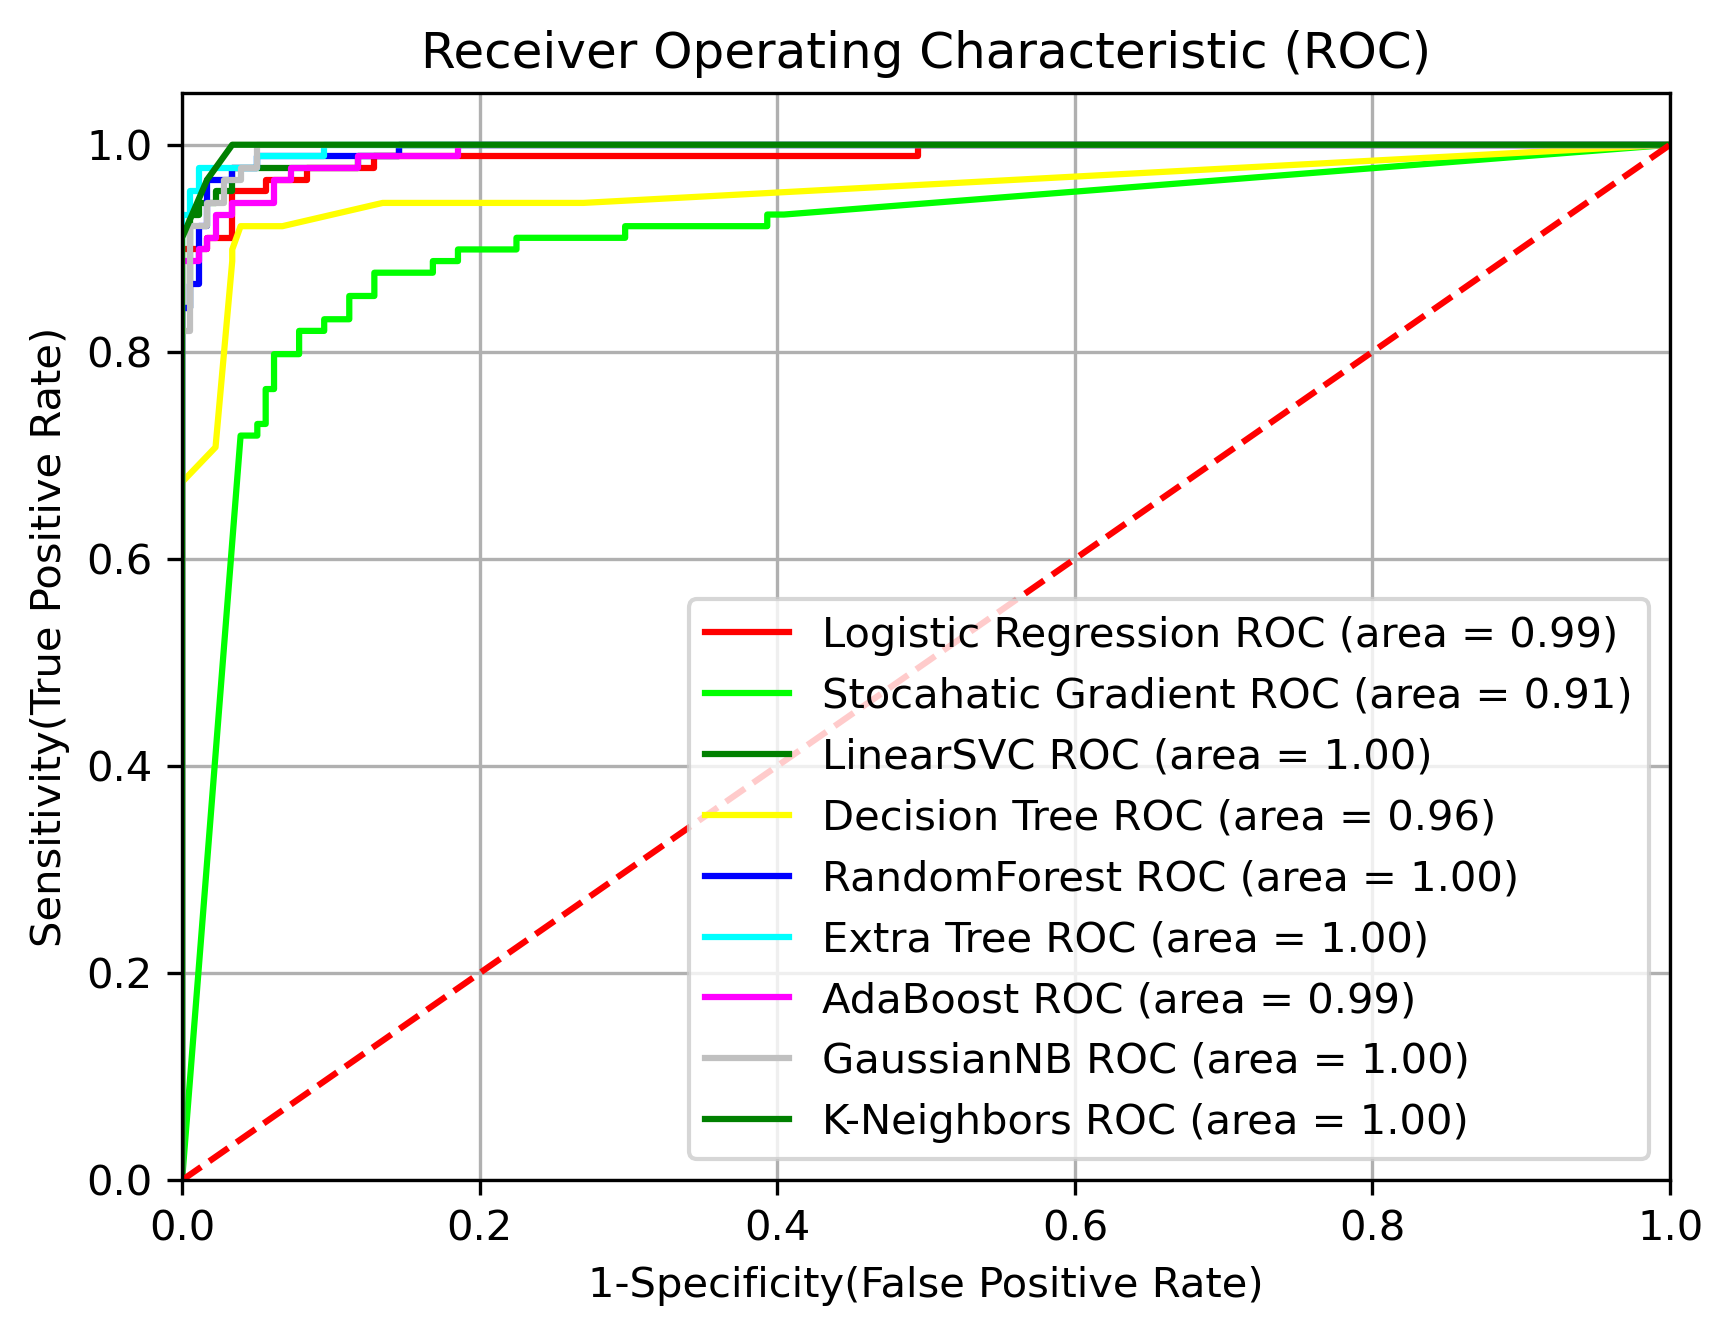

In [63]:
plt.figure(figsize=(6.4,4.8),dpi=300)
model_tree=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3, min_samples_leaf=2,random_state=10)

# Binarize the output
y1 = label_binarize(y, classes=[0, 1, 2])

# shuffle and split training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y1, test_size=.20, random_state=0)
        
# Add the models to the list that you want to view on the ROC plot
models = [
    {
        'label': 'Logistic Regression',
        'model': OneVsRestClassifier(LogisticRegression(solver='newton-cg', multi_class='auto', C=1.0)),
        'color':  "#FF0000",
        },
    {
        'label': 'Stocahatic Gradient',
        'model': OneVsRestClassifier(linear_model.SGDClassifier(loss='log',max_iter=1000, tol=1e-3)),
        'color':  "#00FF00",
    },
    
     {
        'label': 'LinearSVC',
        'model': OneVsRestClassifier(Pipeline((("scaler", StandardScaler()),
               ("linear_svc", LinearSVC
                (random_state=0, tol=1e-5,max_iter=10000,multi_class='ovr',loss='squared_hinge')),))),
        'color': '#008000'
    }
    
     ,{
        'label': 'Decision Tree',
        'model':  OneVsRestClassifier(tree.DecisionTreeClassifier(criterion='entropy',max_depth=3, min_samples_leaf=2,random_state=10)),
          'color':  "#FFFF00",
    }
    
    ,{
        'label': 'RandomForest',
        'model': OneVsRestClassifier(RandomForestClassifier
                                     (n_estimators=15,random_state=10,min_samples_split=0.1,max_depth=None)),
         'color':  "#0000FF",
    }
    
    ,{
        'label': 'Extra Tree',
        'model':  OneVsRestClassifier(ExtraTreesClassifier(n_estimators=60,random_state=10,min_samples_split=0.1,)),
        'color':  "#00FFFF",
    }
    ,{
        'label': 'AdaBoost',
        'model':OneVsRestClassifier(AdaBoostClassifier(base_estimator=model_tree, random_state=0,learning_rate=0.8)),
        'color': '#FF00FF',
    }
     ,{
        'label': 'GaussianNB',
        'model':  OneVsRestClassifier(GaussianNB()),
          'color': '#C0C0C0',
    }
    ,{
        'label': 'K-Neighbors',
        'model':  OneVsRestClassifier(Pipeline((("scaler", StandardScaler()),
               ("K-Neihbors", KNeighborsClassifier(n_neighbors=5,)),))),
         'color': '#008000',
    }
    
]


# Below for loop iterates through your models list
for m in models:
    # select the model
    model = m['model'] 
    
    # train the model and predict the test data
    try:
        
        y_score=model.fit(X_train,Y_train).predict_proba(X_test)
        
    except Exception as e:
        
        print('exception occured: ', e)
        
        y_score=model.fit(X_train,Y_train).decision_function(X_test)
        
        
        
    # Compute False postive rate, and True positive rate
    fpr, tpr,_= metrics.roc_curve(Y_test.ravel(), y_score.ravel())
    
    # Calculate Area under the curve to display on the plot
    roc_auc = auc(fpr, tpr)
    
    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc),color=m['color'])

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True)
plt.xlabel('1-Specificity(False Positive Rate)',fontsize=10)
plt.ylabel('Sensitivity(True Positive Rate)',fontsize=10)
plt.title('Receiver Operating Characteristic (ROC)',fontsize=12)
plt.legend(loc="lower right",fontsize=10)
plt.savefig('ROC Curve_selected_models.tif',bbox_inches="tight")
plt.show()   # Display